In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('../Data/gss_subset_cleaned.csv')
# drop features found to have high correlation with others
data.drop(['maeduc', 'paeduc', 'speduc', 'hompop', 'earnrs'], axis=1, inplace=True)

# filter on years > 2005
data = data[data['year']>2005]

# drop year and income (income uses same brackets over time; is not inflation-adjusted)
data.drop(['year', 'income'], axis=1, inplace=True)

# remove columns with <10,000 valid values and then drop remaining rows with NA vals
data = data.drop(['goodlife', 'satjob', 'health'], axis=1).dropna()
# get dummies for categorical data
data = pd.get_dummies(data, drop_first=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 46510 to 59598
Data columns (total 26 columns):
sibs                     10883 non-null float64
childs                   10883 non-null float64
age                      10883 non-null float64
educ                     10883 non-null float64
babies                   10883 non-null float64
preteen                  10883 non-null float64
teens                    10883 non-null float64
adults                   10883 non-null float64
polviews                 10883 non-null float64
happy                    10883 non-null float64
weekswrk                 10883 non-null float64
satfin                   10883 non-null float64
marital_married          10883 non-null float64
marital_never_married    10883 non-null float64
marital_separated        10883 non-null float64
marital_widowed          10883 non-null float64
divorce_yes              10883 non-null float64
sex_Male                 10883 non-null float64
dwelling_house         

In [5]:
# set target and features
target = data.happy
features = data.drop('happy', axis=1)

## Perform PCA on features

In [6]:
# get eigenvalues and eigenvectors
feats_standard = (features - features.mean())/features.std()
feats_corr = np.corrcoef(feats_standard.values.T)
eig_vals, eig_vecs = np.linalg.eig(feats_corr)

In [7]:
# get explained variance from each component
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
print var_exp

[12.396407002456128, 9.4214523295247012, 8.1473158573361726, 6.2158349962065413, 5.0495715750021271, 4.6753266521383212, 4.5413469667661914, 4.4056618432257828, 4.3100449430486032, 4.1622299419426074, 3.9841703583755139, 3.8516204813576831, 3.4979755241125101, 3.437060894192931, 3.2093918110468, 3.1300038357749473, 2.8137325371195869, 2.6022554092246555, 2.3827716932245431, 2.1292043137607091, 2.0207536350586959, 1.5889530707159296, 1.1586099019188985, 0.81338494596832778, 0.054919480501058271]


In [8]:
# look at cumulative variance explained by top components
cum_var_exp = np.cumsum(var_exp)
print cum_var_exp

[ 12.396407    21.81785933  29.96517519  36.18101019  41.23058176
  45.90590841  50.44725538  54.85291722  59.16296217  63.32519211
  67.30936247  71.16098295  74.65895847  78.09601937  81.30541118
  84.43541501  87.24914755  89.85140296  92.23417465  94.36337897
  96.3841326   97.97308567  99.13169557  99.94508052 100.        ]


### There is not a huge concentration of explained variance among a subset of principal components, as is sometimes seen. Let's dig further into the first 7 principal components, which account for 50% of variance in the data.

In [12]:
# get value and vector pairs
value_vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]

# create weight matrix for top 7 components
value_vector_pairs.sort(reverse=True)
weight_projection = np.hstack((value_vector_pairs[0][1].reshape(eig_vecs.shape[1],1),
    value_vector_pairs[1][1].reshape(eig_vecs.shape[1],1),
    value_vector_pairs[2][1].reshape(eig_vecs.shape[1],1),
    value_vector_pairs[3][1].reshape(eig_vecs.shape[1],1),
    value_vector_pairs[4][1].reshape(eig_vecs.shape[1],1),
    value_vector_pairs[5][1].reshape(eig_vecs.shape[1],1),
    value_vector_pairs[6][1].reshape(eig_vecs.shape[1],1)))

# Use W to transform features matrix to Z: values in new 2D feature space
Z = feats_standard.dot(weight_projection)

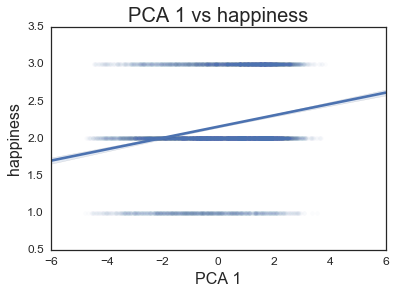

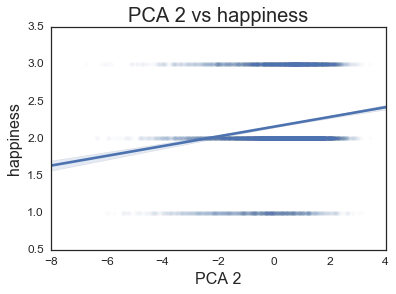

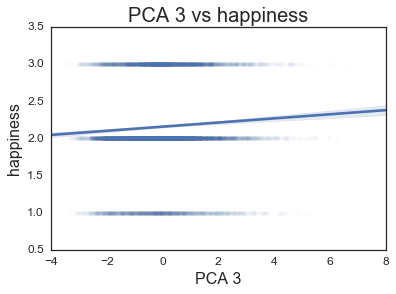

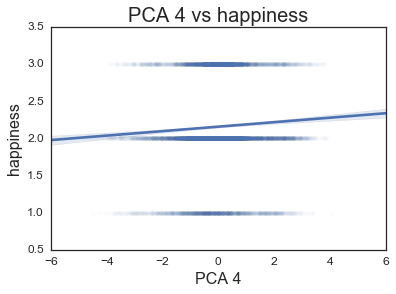

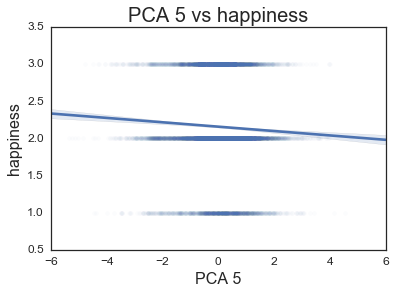

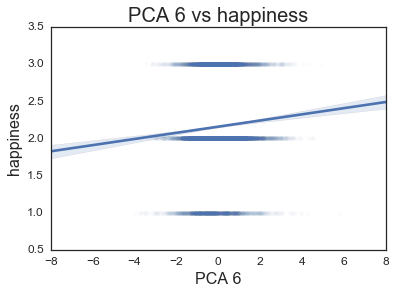

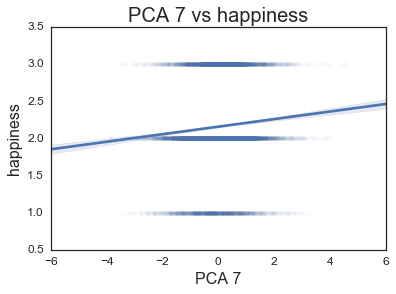

In [15]:
# plot happiness versus each Principal component

for i in range(7):
    pcname = 'PCA %d' % (i+1)
    ax = plt.gca()
    ax = sns.regplot(Z.iloc[:,i], target.values, fit_reg=True, scatter_kws= {'alpha':.02}, ax = ax)
    ax.set_ylabel('happiness', fontsize = 16)
    ax.set_xlabel(pcname, fontsize=16)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12)
    ax.set_title(pcname+' vs happiness', fontsize=20)

    plt.show()